In [528]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [529]:
prm = torch.load('../data storage/prm_data_L16_FCNN_Nh3.pth')
prm

OrderedDict([('fc1.weight',
              tensor([[-1.4507e-02,  5.1702e-02, -1.3150e-01,  6.4371e-02, -9.4759e-02,
                       -1.4333e-03,  2.2740e-02, -1.5336e-02,  1.9691e-01,  5.7276e-03,
                       -2.0879e-02, -7.3055e-02,  1.1403e-01, -1.9604e-02, -8.8354e-02,
                        6.0568e-02,  1.3992e-01,  8.2736e-02,  5.0085e-03, -2.2824e-03,
                        1.3431e-01, -9.0853e-02,  1.3550e-01, -2.9658e-02, -2.1322e-02,
                       -2.0101e-02,  2.0004e-01,  1.6537e-03,  1.0204e-01, -5.6200e-02,
                        1.2098e-01,  9.5701e-02,  3.4570e-03, -7.1663e-02,  6.7418e-02,
                        7.8795e-02,  1.1265e-02, -1.4931e-01,  7.0265e-02, -2.1494e-02,
                       -1.0242e-01,  6.2501e-02, -1.0928e-02,  6.7560e-02,  5.7610e-02,
                       -3.2806e-02,  6.2895e-02,  1.2455e-02,  1.1474e-01, -9.0676e-03,
                       -4.2470e-02,  1.0763e-01,  9.8391e-02,  1.8090e-01,  1.8295e-02,
    

In [530]:
fc2_weight = prm['fc2.weight']
fc2_weight

tensor([[-1.0774e+01, -1.1736e+01,  6.2649e-01],
        [-1.3075e+01, -1.1773e+01,  1.3660e+00],
        [-1.0668e+01, -1.1840e+01,  1.7361e+00],
        [-9.3958e+00, -1.0578e+01,  9.8084e-01],
        [-8.8107e+00, -9.5268e+00,  8.2032e-01],
        [-5.3873e+00, -6.2854e+00,  1.4436e+00],
        [-5.2006e+00, -5.2985e+00, -1.9702e+00],
        [-3.6645e-01, -3.9641e-01, -2.0056e-01],
        [ 9.9672e-01,  1.1064e+00, -3.9605e+00],
        [ 6.6390e-01, -2.6681e-01, -8.8840e+00],
        [ 4.8175e-01,  2.1360e-01, -1.2240e+01],
        [ 1.0721e+00,  6.5483e-01, -1.4178e+01],
        [ 2.9247e-01,  1.2637e+00, -1.5313e+01],
        [ 7.3493e-01,  1.5205e+00, -1.6236e+01],
        [ 4.0851e-01,  6.1835e-01, -1.6750e+01],
        [ 1.5506e+00,  1.2559e+00, -1.6914e+01],
        [ 1.6713e+00, -8.5645e-04, -1.6598e+01],
        [-4.9087e-01,  1.4466e+00, -1.6739e+01],
        [ 1.0032e+00,  7.6238e-01, -1.7743e+01],
        [ 1.5220e+00,  2.9265e-01, -1.7319e+01]])

In [531]:
fc2_weight.size()

torch.Size([20, 3])

In [532]:
# NumPy配列に変換
fc2_weight_np = fc2_weight.cpu().numpy()
# データを転置して
fc2_weight_np_square = fc2_weight_np.T

In [533]:
fc2_weight_np_square

array([[-1.0774304e+01, -1.3074658e+01, -1.0667519e+01, -9.3958416e+00,
        -8.8107424e+00, -5.3873329e+00, -5.2006173e+00, -3.6644953e-01,
         9.9671894e-01,  6.6389775e-01,  4.8174945e-01,  1.0720911e+00,
         2.9246810e-01,  7.3492867e-01,  4.0850997e-01,  1.5505663e+00,
         1.6713054e+00, -4.9086896e-01,  1.0032057e+00,  1.5220016e+00],
       [-1.1736327e+01, -1.1772720e+01, -1.1839569e+01, -1.0577925e+01,
        -9.5267839e+00, -6.2854142e+00, -5.2985349e+00, -3.9640996e-01,
         1.1063857e+00, -2.6681495e-01,  2.1360129e-01,  6.5482932e-01,
         1.2636906e+00,  1.5204725e+00,  6.1835450e-01,  1.2559310e+00,
        -8.5645210e-04,  1.4465663e+00,  7.6237571e-01,  2.9265243e-01],
       [ 6.2648845e-01,  1.3659720e+00,  1.7361189e+00,  9.8084497e-01,
         8.2032198e-01,  1.4435985e+00, -1.9702386e+00, -2.0055668e-01,
        -3.9604874e+00, -8.8839788e+00, -1.2239850e+01, -1.4178205e+01,
        -1.5312715e+01, -1.6235910e+01, -1.6749634e+01, -1.691

In [534]:
fc2_weight_np_square.shape

(3, 20)

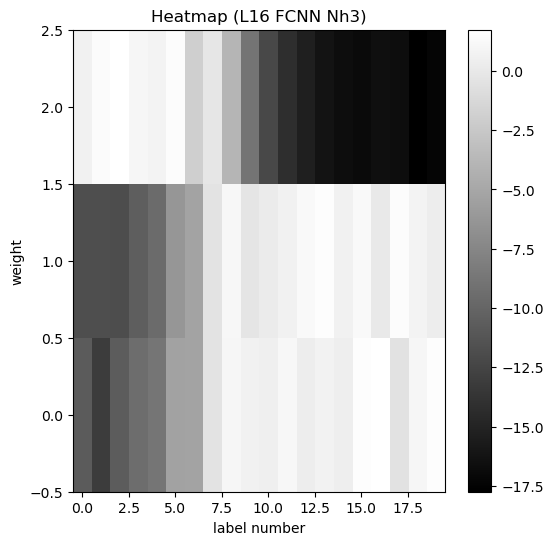

In [535]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh3)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_wight.png')
plt.show()

In [536]:
fc2_weight_np_square_sum = np.sum(fc2_weight_np_square, axis=0)
fc2_weight_np_square_sum

array([-21.884144  , -23.481405  , -20.77097   , -18.992922  ,
       -17.517204  , -10.229148  , -12.469391  ,  -0.96341616,
        -1.8573828 ,  -8.4868965 , -11.544499  , -12.451284  ,
       -13.756556  , -13.980509  , -15.722769  , -14.107803  ,
       -14.927386  , -15.782874  , -15.977396  , -15.504806  ],
      dtype=float32)

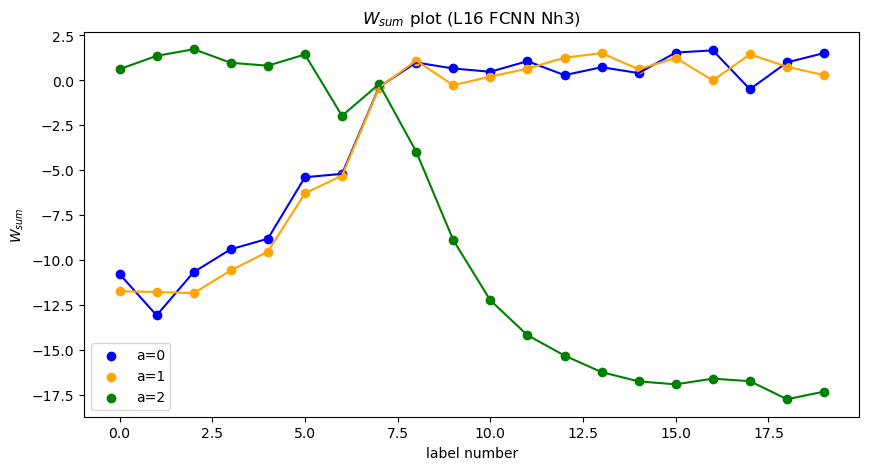

In [537]:
import numpy as np
import matplotlib.pyplot as plt

# データ
x = np.arange(len(fc2_weight_np_square[1]))
y0 = fc2_weight_np_square[0]
y1 = fc2_weight_np_square[1]
y2 = fc2_weight_np_square[2]

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')
plt.plot(x, y0, color='blue')
plt.plot(x, y1, color='orange')
plt.plot(x, y2, color='green')
plt.title('$W_{sum}$ plot (L16 FCNN Nh3)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_weight_plot.png')
plt.legend()  # 凡例を表示
plt.show()

第1層の出力と磁化の相関図を作成

In [538]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [539]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [540]:
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16_v2.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [541]:
# # 磁化を計算
# def magnetization(state):
#     return np.mean(state)

# for i in range(len(spin_data)):
#     mag = magnetization(spin_data[i])
#     if mag > 0:
#         spin_data[i] *= -1

In [542]:
spin_data[0].shape

(16, 16)

In [543]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]
flat_spin_data[0].shape

(256,)

In [544]:
fc1_weight = prm['fc1.weight'].numpy()
len(fc1_weight)

3

In [545]:
fc1_bias = prm['fc1.bias'].numpy()
fc1_bias

array([-2.3344219, -2.4983053,  3.0899003], dtype=float32)

In [546]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [547]:
len(output_data_0)

40000

In [548]:
len(mag_data)

40000

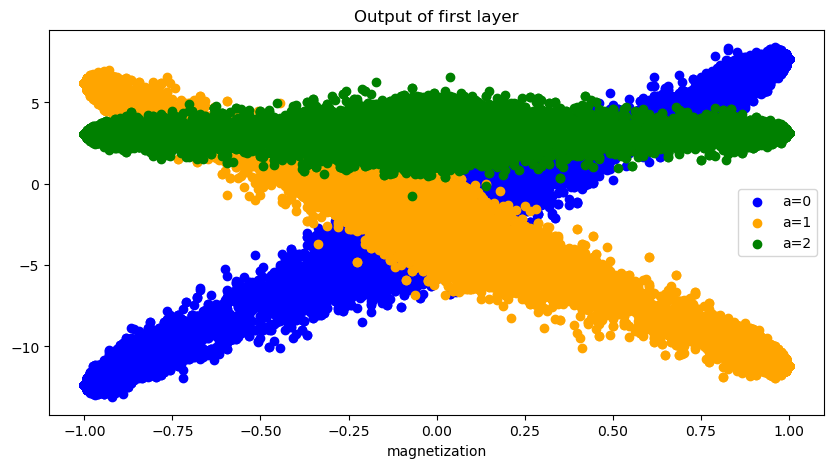

In [549]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()